In [1]:
from google.colab import files

uploaded = files.upload()

Saving ready.outcome3.csv to ready.outcome3.csv


In [2]:
import pandas as pd
import io

outcome3 = pd.read_csv(io.BytesIO(uploaded['ready.outcome3.csv']))
print(outcome3)

      v000  v007  v013  v025  v106  v190                                 v501  \
0      NG7  2018     6     1     4     5                  living with partner   
1      NG7  2018     5     1     4     5                              married   
2      NG7  2018     3     1     4     5                              married   
3      NG7  2018     3     1     3     5                              married   
4      NG7  2018     2     1     3     5  no longer living together/separated   
...    ...   ...   ...   ...   ...   ...                                  ...   
88268  ZW7  2015     5     0     2     3                              married   
88269  ZW7  2015     4     0     3     3                              married   
88270  ZW7  2015     2     0     2     2                              married   
88271  ZW7  2015     6     0     2     3                              married   
88272  ZW7  2015     6     0     2     3                              married   

           v501a           

In [3]:
from sklearn.model_selection import train_test_split
outcome3_train, outcome3_test = train_test_split(
outcome3, test_size=0.25, stratify=outcome3[['v000', 'child.status']])

x_train = outcome3_train[['v000_AO7', 'v000_ET7', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 'v000_ZM7', 'v000_ZW7',
                          'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'v228', 'm15', 'ANC.facility', 'v401', 'b0', 'b4', 'b20']]
y_train = outcome3_train['child.status']
y2_train = outcome3_train['b5']


x_test = outcome3_test[['v000_AO7', 'v000_ET7', 'v000_ML7', 'v000_NG7', 'v000_ZA7', 'v000_ZM7', 'v000_ZW7',
                          'v013', 'v025', 'v106', 'v190', 'v501b_Formerly married', 'v501b_Married', 
                          'v501b_Never married', 'v228', 'm15', 'ANC.facility', 'v401', 'b0', 'b4', 'b20']]
y_test = outcome3_test['child.status']
y2_test = outcome3_test['b5']

print(outcome3_train.shape, outcome3_test.shape)
print(x_train.shape, x_test.shape)

(66204, 28) (22069, 28)
(66204, 21) (22069, 21)


Logistic: ROC AUC=0.697


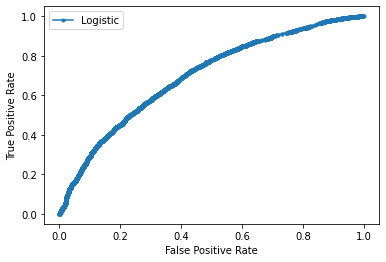

In [5]:
# roc curve and auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y2_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y2_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y2_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


model = MultinomialNB()
model.fit(x_train, y_train)
labels = model.predict(x_test)
nb_train_accuracy = []
nb_test_accuracy = []
nb_train_accuracy.append(model.score(x_train, y_train))
nb_test_accuracy.append(model.score(x_test, y_test))
print(nb_train_accuracy, nb_test_accuracy)


model_2 = MultinomialNB()
model_2.fit(x_train, y2_train)
labels_2 = model_2.predict(x_test)
nb2_train_accuracy = []
nb2_test_accuracy = []
nb2_train_accuracy.append(model_2.score(x_train, y2_train))
nb2_test_accuracy.append(model_2.score(x_test, y2_test))
print(nb2_train_accuracy, nb2_test_accuracy)

cv_train = cross_val_score(model, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(model, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(model_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(model_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(model, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(model_2, x_test, y2_test, cv=10)


accuracy = pd.DataFrame()
accuracy = accuracy.append([["Naive Baye's", (cv_train.mean()), (cv_test.mean())]])

accuracy2 = pd.DataFrame()
accuracy2 = accuracy2.append([["Naive Baye's", (cv_train2.mean()), (cv_test2.mean())]])

[0.6153102531569089] [0.6138474783633151]
[0.9303818500392725] [0.9305360460374281]
Percent accuracy within each fold (First): 

[0.6139556  0.61531491 0.61893974 0.61591905 0.61268882 0.61374622
 0.61978852 0.61314199 0.62220544 0.60800604] 
 [0.60806525 0.61848663 0.6148618  0.61939284 0.61350249 0.60761214
 0.6139556  0.61622111 0.61758043 0.60924751]

Mean & SD accuracy: 

0.6153706324881328 0.6138925803129498
0.003877006899867335 0.0040798825282222975

Percent accuracy within each fold (Second): 

[0.93007099 0.93037306 0.93037306 0.93037306 0.9305136  0.9305136
 0.93036254 0.93036254 0.93036254 0.93036254] 
 [0.93067512 0.93022202 0.93067512 0.93067512 0.93067512 0.93022202
 0.93022202 0.93022202 0.93022202 0.93019039]

Mean & SD accuracy: 

0.9303667493934661 0.9304000992473875
0.00011436496187509005 0.00022474283306204824


Naive Bayes: ROC AUC=0.664


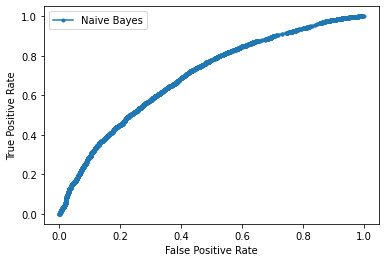

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# fit a model
model_2 = MultinomialNB()
model_2.fit(x_train, y2_train)
# predict probabilities
nb_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
nb_probs = nb_probs[:, 1]
# calculate scores
nb_auc = roc_auc_score(y2_test, nb_probs)
# summarize scores
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
# calculate roc curves
nb_fpr, nb_tpr, _ = roc_curve(y2_test, nb_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
labels_tree = tree.predict(x_test)

tree_2 = DecisionTreeClassifier(random_state=0)
tree_2.fit(x_train, y2_train)
labels_tree2 = tree_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

print("Accuracy on training set: {:.3f}".format(tree_2.score(x_train, y2_train)))
print("Accuracy on test set: {:.3f}".format(tree_2.score(x_test, y2_test)))

cv_train = cross_val_score(tree, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(tree, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(tree_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(tree_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(tree, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(tree_2, x_test, y2_test, cv=10)

accuracy = pd.DataFrame()
accuracy = accuracy.append([["Decision Tree", (cv_train.mean()), (cv_test.mean())]])

accuracy2 = pd.DataFrame()
accuracy2 = accuracy2.append([["Decision Tree", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.732
Accuracy on test set: 0.594
Accuracy on training set: 0.946
Accuracy on test set: 0.910
Percent accuracy within each fold (First): 

[0.58374868 0.59809696 0.59265972 0.59130041 0.58549849 0.59199396
 0.59138973 0.58277946 0.59305136 0.58942598] 
 [0.57272315 0.56728591 0.56728591 0.57045763 0.58903489 0.57544178
 0.57317626 0.56411418 0.57091074 0.57751587]

Mean & SD accuracy: 

0.5899944742330889 0.5727946314393213
0.004487227035341073 0.006620022696651647

Percent accuracy within each fold (Second): 

[0.90454614 0.9078689  0.90817097 0.90107235 0.90996979 0.90634441
 0.90574018 0.90876133 0.91012085 0.90589124] 
 [0.89352062 0.88808337 0.89623924 0.89759855 0.88808337 0.89080199
 0.8917082  0.89397372 0.89487993 0.89573889]

Mean & SD accuracy: 

0.9068486154326318 0.893062788350427
0.002606979056600729 0.003141674741219054


Decision Tree: ROC AUC=0.600


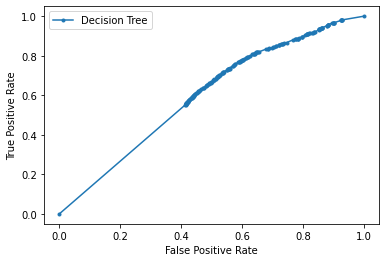

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
clf_gini.fit(x_train, y_train)
labels_gini = clf_gini.predict(x_test)

clf_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
clf_gini2.fit(x_train, y2_train)
labels_gini2 = clf_gini2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(clf_gini.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf_gini.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(clf_gini2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(clf_gini2.score(x_test, y2_test)))

cv_train = cross_val_score(clf_gini, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(clf_gini, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(clf_gini2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(clf_gini2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(clf_gini, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(clf_gini2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Decision Tree (Gini)", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Decision Tree (Gini)", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.652
Accuracy on test set: 0.638
Accuracy on training set (Child loss): 0.934
Accuracy on test set (Child loss): 0.928
Percent accuracy within each fold (First): 

[0.63540251 0.63283492 0.6428032  0.63872527 0.62190332 0.64169184
 0.63685801 0.63111782 0.63867069 0.63670695] 
 [0.63343906 0.62528319 0.63570458 0.62528319 0.63389216 0.62573629
 0.63207975 0.63253285 0.63117354 0.64505893]

Mean & SD accuracy: 

0.6356714536873657 0.6320183533724599
0.005712473347368363 0.00565990952147474

Percent accuracy within each fold (Second): 

[0.92674823 0.92916478 0.92780547 0.92674823 0.92719033 0.92734139
 0.93006042 0.92809668 0.92809668 0.92703927] 
 [0.92297236 0.92115995 0.92614409 0.92523788 0.92433167 0.92387857
 0.92387857 0.92387857 0.92569098 0.92293744]

Mean & SD accuracy: 

0.9278291470287481 0.9240110075869206
0.0010253234649642681 0.0013925835235496975


Decision Tree: ROC AUC=0.671


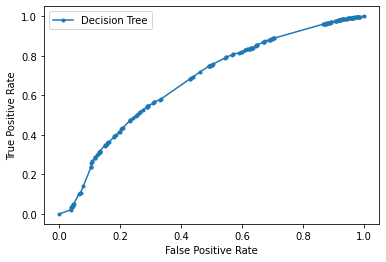

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier

# fit a model
model_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 10, min_samples_leaf=1)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
labels_rf = forest.predict(x_test)

forest_2 = RandomForestClassifier(n_estimators=100, random_state=0)
forest_2.fit(x_train, y2_train)
labels_rf2 = forest.predict(x_test)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(forest_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(forest_2.score(x_test, y2_test)))

cv_train = cross_val_score(forest, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(forest, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(forest_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(forest_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(forest, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(forest_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Random Forest", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Random Forest", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.731
Accuracy on test set: 0.611
Accuracy on training set (Child loss): 0.946
Accuracy on test set (Child loss): 0.926
Percent accuracy within each fold (First): 

[0.59960731 0.60489352 0.59703972 0.61274732 0.61102719 0.60996979
 0.60332326 0.60725076 0.61132931 0.60513595] 
 [0.6021749  0.59673765 0.59673765 0.59401903 0.59220662 0.59900317
 0.59356593 0.60308111 0.59900317 0.60426111]

Mean & SD accuracy: 

0.6062324125699106 0.5980790331266911
0.004962587708325647 0.003958011800960338

Percent accuracy within each fold (Second): 

[0.92267029 0.92387857 0.92372753 0.92553995 0.92628399 0.92401813
 0.92779456 0.92386707 0.92507553 0.92296073] 
 [0.92206615 0.91753512 0.92251926 0.92387857 0.92025374 0.92115995
 0.92161305 0.92478478 0.92206615 0.91885766]

Mean & SD accuracy: 

0.9245816341942306 0.9214734416701823
0.001507173557686611 0.002061651728984224


Random Forest: ROC AUC=0.650


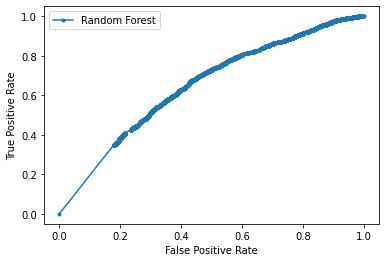

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

# fit a model
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Random Forest: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 10)
gbrt.fit(x_train, y_train)
labels_gbrt = gbrt.predict(x_test)

gbrt_2 = GradientBoostingClassifier(random_state=0, max_depth = 10)
gbrt_2.fit(x_train, y2_train)
labels_gbrt2 = gbrt_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(gbrt_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(gbrt_2.score(x_test, y2_test)))

cv_train = cross_val_score(gbrt, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(gbrt, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(gbrt_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(gbrt_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(gbrt, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(gbrt_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["Gradient Boost", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["Gradient Boost", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.714
Accuracy on test set: 0.627
Accuracy on training set (Child loss): 0.943
Accuracy on test set (Child loss): 0.927
Percent accuracy within each fold (First): 

[0.61214318 0.6178825  0.61350249 0.63026733 0.61993958 0.62205438
 0.62084592 0.61661631 0.62296073 0.61767372] 
 [0.60579973 0.59447213 0.60398731 0.60444042 0.59945628 0.60489352
 0.60172179 0.61123697 0.59990938 0.62692656]

Mean & SD accuracy: 

0.6193886133610397 0.6052844099032132
0.004905891685511445 0.0083611280076904

Percent accuracy within each fold (Second): 

[0.92448271 0.92418064 0.92614409 0.9279565  0.92356495 0.92598187
 0.92734139 0.92250755 0.92734139 0.92643505] 
 [0.91753512 0.91980063 0.92297236 0.92433167 0.91753512 0.91844132
 0.91889443 0.92569098 0.92025374 0.92112421]

Mean & SD accuracy: 

0.925593613837871 0.9206579575988542
0.0017240737359878195 0.0026986582790829534


Decision Tree: ROC AUC=0.661


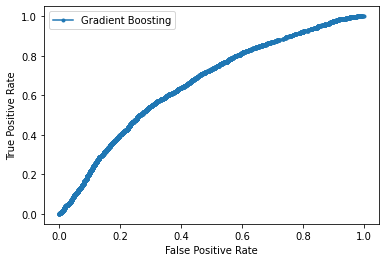

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingClassifier

# fit a model
model_2 = GradientBoostingClassifier(random_state=0, max_depth = 10)
model_2.fit(x_train, y2_train)
# predict probabilities
dtc_probs = model_2.predict_proba(x_test)
# keep probabilities for the positive outcome only
dtc_probs = dtc_probs[:, 1]
# calculate scores
dtc_auc = roc_auc_score(y2_test, dtc_probs)
# summarize scores
print('Decision Tree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
dtc_fpr, dtc_tpr, _ = roc_curve(y2_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(dtc_fpr, dtc_tpr, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
labels_svc = svc.predict(x_test)

svc_2 = SVC()
svc_2.fit(x_train, y2_train)
labels_svc2 = svc_2.predict(x_test)

print("Accuracy on training set: {:.3f}".format(svc.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(x_test, y_test)))

print("Accuracy on training set (Child loss): {:.3f}".format(svc_2.score(x_train, y2_train)))
print("Accuracy on test set (Child loss): {:.3f}".format(svc_2.score(x_test, y2_test)))

cv_train = cross_val_score(svc, x_train, y_train, cv = 10, scoring = "accuracy")
cv_test = cross_val_score(svc, x_test, y_test, cv = 10, scoring = "accuracy")

cv_train2 = cross_val_score(svc_2, x_train, y2_train, cv = 10, scoring = "accuracy")
cv_test2 = cross_val_score(svc_2, x_test, y2_test, cv = 10, scoring = "accuracy")

print("Percent accuracy within each fold (First): \n")
print(cv_train, "\n", cv_test)
print("\nMean & SD accuracy: \n")
print(cv_train.mean(), cv_test.mean())
print(cv_train.std(), cv_test.std())

print("\nPercent accuracy within each fold (Second): \n")
print(cv_train2, "\n", cv_test2)
print("\nMean & SD accuracy: \n")
print(cv_train2.mean(), cv_test2.mean())
print(cv_train2.std(), cv_test2.std())

cv_labels = cross_val_predict(svc, x_test, y_test, cv=10)
cv_labels2 = cross_val_predict(svc_2, x_test, y2_test, cv=10)

accuracy = accuracy.append([["SVM", (cv_train.mean()), (cv_test.mean())]])
accuracy2 = accuracy2.append([["SVM", (cv_train2.mean()), (cv_test2.mean())]])

Accuracy on training set: 0.637
Accuracy on test set: 0.637
Accuracy on training set (Child loss): 0.930
Accuracy on test set (Child loss): 0.931
Percent accuracy within each fold (First): 

[0.63223078 0.63661078 0.6305694  0.63479837 0.63277946 0.63564955
 0.64093656 0.63731118 0.6397281  0.63006042] 
 [0.63298595 0.64023561 0.63706389 0.64295424 0.6270956  0.61531491
 0.63570458 0.64250113 0.63570458 0.62601995]

Mean & SD accuracy: 

0.6350674590735055 0.6335580434954963
0.0035011404750288073 0.008161425917476551

Percent accuracy within each fold (Second): 

[0.93037306 0.93037306 0.93037306 0.93037306 0.9305136  0.9305136
 0.93036254 0.93036254 0.93036254 0.93036254] 
 [0.93067512 0.93067512 0.93067512 0.93067512 0.93067512 0.93067512
 0.93022202 0.93022202 0.93022202 0.9306437 ]

Mean & SD accuracy: 

0.9303969563108503 0.9305360509152244
5.850880189369664e-05 0.00020578671352483997
